In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [2]:
# El conjunto de datos "iris":
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Cargamos el conjunto de datos en un dataframe
all_variables = ['sepal length','sepal width','petal length','petal width','target'] #ojo en el tarjet
features = ['sepal length','sepal width','petal length','petal width']
target = ['target']

df = pd.read_csv(file, names=all_variables)
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,sepal length,sepal width,petal length,petal width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [4]:
#
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,sepal length,sepal width,petal length,petal width
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129


In [5]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [6]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','target']
df_pca.head()

,PC1,PC2,PC3,PC4,target
0,-2.684207,0.326607,-0.021512,0.001006,Iris-setosa
1,-2.715391,-0.169557,-0.203521,0.099602,Iris-setosa
2,-2.889820,-0.137346,0.024709,0.019305,Iris-setosa
3,-2.746437,-0.311124,0.037672,-0.075955,Iris-setosa
4,-2.728593,0.333925,0.096230,-0.063129,Iris-setosa


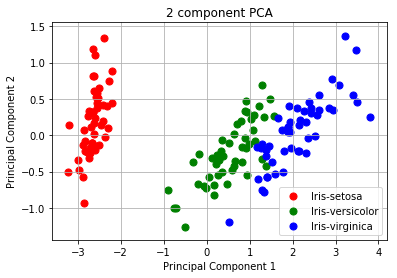

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

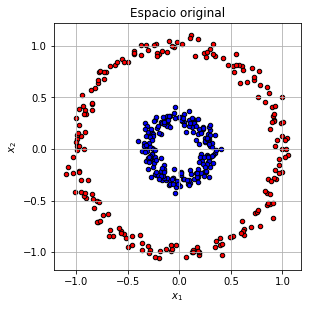

In [8]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

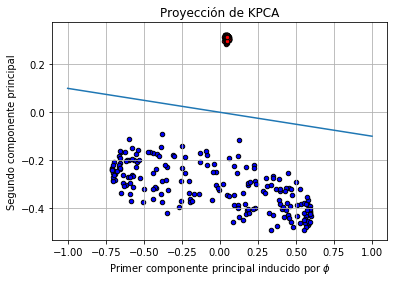

In [9]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()